CS166 Pre-class work 14.2
# MCMC methods for parameter estimation
#### April 7, 2020 | Rebecca Mqamelo 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

In [3]:
data = pd.read_csv('https://gist.githubusercontent.com/raquelhr/d1324510056353feeccf111d6b186a0d/raw/7b3bccc7917f3baa7ec1d919195d120083ee75e9/proctatinium_data.csv')
t_values = np.array(data["time"], dtype=float)
count_values = np.array(data["count_rate"], dtype=float)

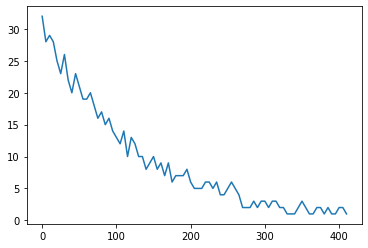

In [11]:
plt.plot(t_values, count_values)

In [15]:
def decay_32(t, lamb):
    return 32*np.exp(-lamb*t)

lamb = 1

optimal_params =[]

for t in range(1000):
    # add noise to data
    noise = pd.Series(np.random.normal(0, 1,len(data)))
    noisy = pd.Series(data["count_rate"])
    noisy = noisy+noise
    popt,pcov = curve_fit(decay_32,data["time"],noisy)
    optimal_params.append(popt[0])

/Users/rebeccamqamelo/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


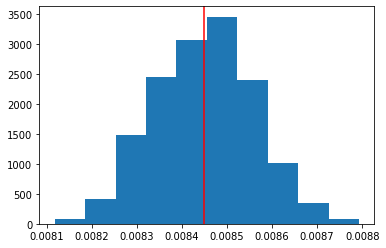

Best estimate for lambda: 0.008449787918323192
Which corresponds to a half-life of 1.3671885165639677 minutes.


In [16]:
mean = np.mean(optimal_params)
plt.hist(optimal_params,density=True)
plt.axvline(mean,color="r")
plt.show()

print("Best estimate for lambda:", np.mean(mean))
print("Which corresponds to a half-life of",np.log(2)/(mean*60),"minutes.")